In [19]:
import numpy as np
import cv2 
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.backend import cast
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras import backend as K
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
seed=7
np.random.seed(seed)

In [21]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28,1).astype('float32')

In [24]:
X_train =X_train/255
X_test =X_test/255

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [26]:
model=Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 flatten_1 (Flatten)         (None, 400)              

In [28]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotation angle in degrees
    width_shift_range=0.1,  # Shift fraction of total width
    height_shift_range=0.1,  # Shift fraction of total height
    shear_range=0.1,  # Shear intensity
    zoom_range=0.1,  # Range for random zoom
    horizontal_flip=True  # Randomly flip inputs horizontally
)

datagen.fit(X_train)


In [29]:

model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,  
    epochs=50, 
    validation_data=(X_test, y_test)  
)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5136 - accuracy: 0.8291 - val_loss: 0.1004 - val_accuracy: 0.9671
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2019 - accuracy: 0.9364 - val_loss: 0.0775 - val_accuracy: 0.9733
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1627 - accuracy: 0.9483 - val_loss: 0.0788 - val_accuracy: 0.9725
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1390 - accuracy: 0.9566 - val_loss: 0.0735 - val_accuracy: 0.9755
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1243 - accuracy: 0.9615 - val_loss: 0.0509 - val_accuracy: 0.9826
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1183 - accuracy: 0.9630 - val_loss: 0.0598 - val_accuracy: 0.9798
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1119 - accuracy: 0.9647 - val_loss: 0.0561 - val_accuracy

In [30]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

In [31]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Test loss: 0.043308887630701065
Test accuracy: 0.9858999848365784


Prediction of model: [2.69702853e-13 8.26354374e-10 9.99984980e-01 3.16758459e-08
 2.75351871e-13 1.38785763e-05 1.21563515e-08 1.14266015e-06
 2.18185626e-12 1.46594068e-13]
Actual class:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


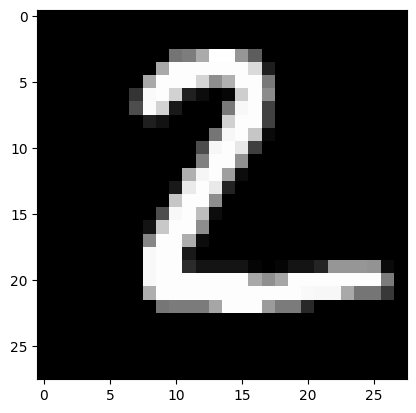

In [32]:
image = (X_test[1]).reshape(1,28,28,1) 
model_pred = model.predict(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))
print('Actual class:{}'.format(y_test[1]))
plt.imshow(image.reshape(28,28,1),cmap='gray')

Test images shape: (4, 28, 28, 1)
Predicted digit: [2.69702853e-13 8.26354374e-10 9.99984980e-01 3.16758459e-08
 2.75351871e-13 1.38785763e-05 1.21563515e-08 1.14266015e-06
 2.18185626e-12 1.46594068e-13]
Predicted digit: [4.3237920e-09 9.9999547e-01 2.2088908e-09 5.0967657e-11 9.5776693e-07
 9.8981268e-09 2.7662832e-08 3.3908505e-06 6.0555934e-08 4.8382280e-08]
Predicted digit: [9.9999905e-01 1.0514487e-17 8.9743279e-10 1.4545082e-10 4.2273151e-12
 3.4738556e-11 8.9399418e-07 1.1125845e-13 4.7373745e-09 2.2350783e-08]
Predicted digit: [1.2339649e-10 6.0290634e-10 5.0923302e-07 7.1736630e-09 9.9995053e-01
 3.4651428e-08 3.6044040e-07 3.2842941e-08 2.1932732e-07 4.8238326e-05]


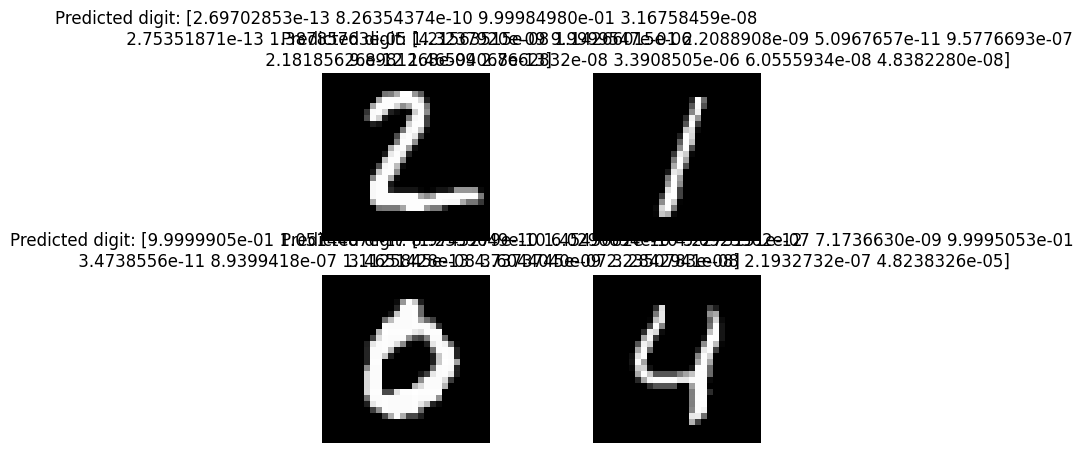

In [33]:
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))


In [34]:
model_json = model.to_json()


In [35]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)



In [36]:
model.save_weights("models.h5")
print("Saved model to disk")

Saved model to disk
